<a href="https://colab.research.google.com/github/stazam/Exploratory-analysis---House-pricing-public-/blob/main/cvi%C4%8Denie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.neighbors import KNeighborsClassifier

print(tf.__version__)



2.3.0


In [271]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [272]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

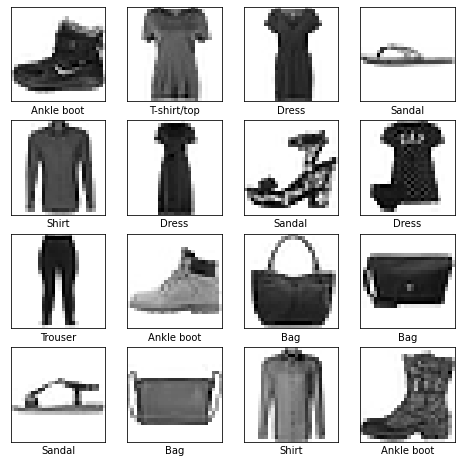

In [273]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])

In [274]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [275]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

In [276]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])


In [277]:
cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [278]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [209]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 10,
  validation_data = (x_test, y_test),
  verbose = 1
)



Epoch 1/10
235/235 [==============================] - 119s 505ms/step - loss: 0.6031 - accuracy: 0.7861 - val_loss: 0.3979 - val_accuracy: 0.8521
Epoch 2/10
235/235 [==============================] - 119s 506ms/step - loss: 0.4096 - accuracy: 0.8543 - val_loss: 0.3451 - val_accuracy: 0.8764
Epoch 3/10
235/235 [==============================] - 120s 509ms/step - loss: 0.3522 - accuracy: 0.8732 - val_loss: 0.3077 - val_accuracy: 0.8860
Epoch 4/10
235/235 [==============================] - 119s 507ms/step - loss: 0.3141 - accuracy: 0.8862 - val_loss: 0.2822 - val_accuracy: 0.8945
Epoch 5/10
235/235 [==============================] - 124s 529ms/step - loss: 0.2878 - accuracy: 0.8943 - val_loss: 0.2687 - val_accuracy: 0.9019
Epoch 6/10
235/235 [==============================] - 119s 505ms/step - loss: 0.2652 - accuracy: 0.9031 - val_loss: 0.2573 - val_accuracy: 0.9033
Epoch 7/10
235/235 [==============================] - 119s 507ms/step - loss: 0.2475 - accuracy: 0.9092 - val_loss: 0.2604 -

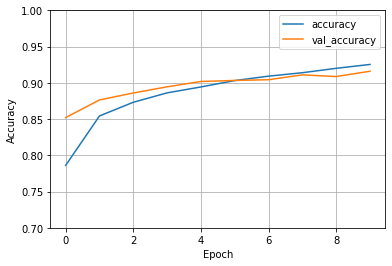

In [279]:
plot_loss(history, ylim=(0.7, 1))


In [211]:
predictions = cnn_model.predict(x_test)

In [212]:
print(predictions.shape)
print(y_test.shape)


(10000, 10)
(10000, 10)


Musíme transformovať "one-hot encoded labels" do 1D poľa, aby sme mohli vytvoriť "confusion matrix".


In [213]:
cmPredictions = predictions.argmax(axis=1)
cmYTest = y_test.argmax(axis=1)

print(cmPredictions.shape)
print(cmYTest.shape)

(10000,)
(10000,)


#COFUSION MATRIX 

In [214]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(cmYTest, cmPredictions)
print(cm)

[[862   1  15  20   4   1  91   0   6   0]
 [  1 980   0  11   2   0   4   0   2   0]
 [ 17   0 838  13  69   0  61   0   2   0]
 [ 10   4   5 928  27   0  25   0   1   0]
 [  0   0  26  24 902   0  48   0   0   0]
 [  0   0   0   0   0 987   0   8   0   5]
 [ 86   2  52  25  68   0 758   0   9   0]
 [  0   0   0   0   0  11   0 960   0  29]
 [  2   2   2   5   2   2   4   4 977   0]
 [  0   0   0   0   0   6   0  25   1 968]]


In [215]:
for i in range(cm.shape[0]):
   cm[i,i] = 0

In [221]:
coef = cm.argmax(axis = 1)
Maximum

for i in range(cm.shape[0]):

  print("%s was badly missclasified for %s: % i times." %(clothes_labels[i],clothes_labels[coef[i]],cm[i,coef[i]]))

print("---------------------------------------------------")

print("The worst out of all is % s missclasified for % s " %(clothes_labels[Maximum[0][0]],clothes_labels[Maximum[1][0]]))

T-shirt/top was badly missclasified for Shirt:  91 times.
Trouser was badly missclasified for Dress:  11 times.
Pullover was badly missclasified for Coat:  69 times.
Dress was badly missclasified for Coat:  27 times.
Coat was badly missclasified for Shirt:  48 times.
Sandal was badly missclasified for Sneaker:  8 times.
Shirt was badly missclasified for T-shirt/top:  86 times.
Sneaker was badly missclasified for Ankle boot:  29 times.
Bag was badly missclasified for Dress:  5 times.
Ankle boot was badly missclasified for Sneaker:  25 times.
---------------------------------------------------
The wort out of all is Shirt missclasified for T-shirt/top 


#16 najhorších predpovedí pomocou NN klasifikátora 

In [217]:
maximas = np.amax(predictions,axis = 1)
maximas1 = maximas[cmYTest != cmPredictions]

maximas1 = maximas1[(-maximas1).argsort()][0:16]

args = []
for i in maximas1:
  args.append(np.where(((maximas == i) & (cmYTest != cmPredictions)))[0][0])
  

Na obrázku nižšie vidíme 16 najhoršie predikovaných obrázkov. Keď sa pozrieme, či majpu spoločný znak, tka vidíme, že naša neurónová sieť má problém s rozproznávaním obrázkov v rámci **rovnakej kategórie**. Tj. Ankle boot - zaradilo ako sandals, alebo **sneakers** ako **ankle boot**. Ďalej niektoré zle určené obrázky sú ťažko rozpoznateľné aj pre človeka, kvôli zle fotografii. To je napríklad **dress** bolo označené ako **trousers**. 

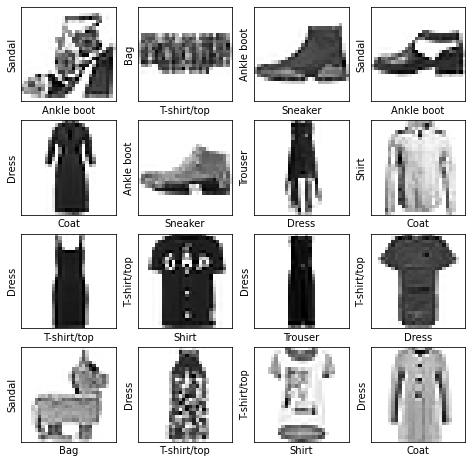

In [224]:
plt.figure(figsize=(8,8))
for i in range(1,17):
  plt.subplot(4, 4, i)
  plt.ylabel(clothes_labels[cmPredictions[args[i-1]]])
  plot_image(x_test[args[i-1]].squeeze(), clothes_labels[cmYTest[args[i-1]]])

##KNN klasifikátor 

In [239]:
x_train.shape

(60000, 28, 28, 1)

In [246]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [267]:
x_train1 = x_train.flatten().reshape(60000,28*28)
x_test1 = x_test.flatten().reshape(10000,28*28)

x_train1.shape, x_test1.shape

((60000, 784), (10000, 784))

In [263]:
KNclf = KNeighborsClassifier()

KNclf.fit(x_train1, y_train)
print(KNclf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [269]:
from sklearn import metrics

predictions = KNclf.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8554
